In [1]:
import re
import pandas as pd
from sklearn.pipeline import Pipeline
import tensorflow as tf

In [2]:
URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
                                  origin=URL,
                                  untar=True,
                                  cache_dir='.',
                                  cache_subdir='')

84131840/84125825 [==============================] - 3s 0us/step


In [3]:
train = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='training', seed=123)
test = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='validation', seed=123)

Found 75000 files belonging to 3 classes.
Using 60000 files for training.
Found 75000 files belonging to 3 classes.
Using 15000 files for validation.


In [4]:
for i in train.take(1):
    train_feat = i[0].numpy()
    train_lab = i[1].numpy()

train = pd.DataFrame([train_feat, train_lab]).T
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
train.loc[train['LABEL_COLUMN'] == 1, ['LABEL_COLUMN']] = 0
train.loc[train['LABEL_COLUMN'] == 2, ['LABEL_COLUMN']] = 1
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,This film resembles in many ways `Enemy of the...,0
1,"Communion is a wonderful film, and one of the ...",1
2,"Fred ""The Hammer"" Williamson delivers another ...",1
3,"Two zany scam artists find it's all HIPS, HIPS...",1
4,A little of those Spanish spicy movies from la...,1


In [5]:
for j in test.take(1):
    test_feat = j[0].numpy()
    test_lab = j[1].numpy()

test = pd.DataFrame([test_feat, test_lab]).T
test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
test['DATA_COLUMN'] = test['DATA_COLUMN'].str.decode("utf-8")
test.loc[test['LABEL_COLUMN'] == 1, ['LABEL_COLUMN']] = 0
test.loc[test['LABEL_COLUMN'] == 2, ['LABEL_COLUMN']] = 1
test.head()

,DATA_COLUMN,LABEL_COLUMN
0,I first became aware of this via the Blue Unde...,1
1,I think someone let a group of college kids ge...,1
2,This movie was bad from the start. The only pu...,0
3,"Unbelievably bad. It's like, you should pardon...",1
4,A very mediocore show. HHH winning really suck...,1


In [6]:
pos_review =[]
neg_review = []
for i in range(len(train)):
  if train['LABEL_COLUMN'][i] == 1:
    pos_review.append(train['DATA_COLUMN'][i])
for i in range(len(train)):
  if train['LABEL_COLUMN'][i] == 0:
    neg_review.append(train['DATA_COLUMN'][i])

pos = pd.DataFrame(data=pos_review,columns=['review'])
neg = pd.DataFrame(data=neg_review,columns=['review'])

In [7]:
pos_train=[]
pos_test =[]
neg_train=[]
neg_test =[]
for i in range(len(pos)):
  if i< 5000:
    pos_train.append(pos['review'][i])
  if i in range(5000,6250):
    pos_test.append(pos['review'][i])
for i in range(len(neg)):
  if i< 5000:
    neg_train.append(neg['review'][i])
  if i in range(5000,6250):
    neg_test.append(neg['review'][i])
train_pos = pd.DataFrame(data=pos_train,columns=['commentaire'])
train_neg = pd.DataFrame(data=neg_train,columns=['commentaire'])
test_pos = pd.DataFrame(data=pos_test,columns=['commentaire'])
test_neg = pd.DataFrame(data=neg_test,columns=['commentaire'])

In [8]:
for i in range(len(test_pos)):
   file = open ('english/test/pos/file_pos'+str(i)+'.txt','w')
   file.write(str(test_pos['commentaire'][i]))
   file.close()

In [9]:
for i in range(len(test_neg)):
   file = open ('english/test/neg/file_neg'+str(i)+'.txt','w')
   file.write(str(test_neg['commentaire'][i]))
   file.close()

In [10]:
for i in range(len(train_pos)):
   file = open ('english/train/pos/file_pos'+str(i)+'.txt','w')
   file.write(str(train_pos['commentaire'][i]))
   file.close()

In [11]:
for i in range(len(train_neg)):
   file = open ('english/train/neg/file_neg'+str(i)+'.txt','w')
   file.write(str(train_neg['commentaire'][i]))
   file.close()

In [12]:
!pip install transformers

     |████████████████████████████████| 2.1MB 28.8MB/s 
     |████████████████████████████████| 3.3MB 47.8MB/s 
     |████████████████████████████████| 901kB 33.3MB/s 


In [13]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

In [14]:
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
import tensorflow as tf

In [16]:
train = tf.keras.preprocessing.text_dataset_from_directory(
    'english/train', batch_size=15000, validation_split=0.2, 
    subset='training', seed=123)
test = tf.keras.preprocessing.text_dataset_from_directory(
    'english/train', batch_size=15000, validation_split=0.2, 
    subset='validation', seed=123)

Found 10000 files belonging to 3 classes.
Using 8000 files for training.
Found 10000 files belonging to 3 classes.
Using 2000 files for validation.


In [17]:
for i in train.take(1):
    train_feat = i[0].numpy()
    train_lab = i[1].numpy()

train = pd.DataFrame([train_feat, train_lab]).T
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
train.loc[train['LABEL_COLUMN'] == 1, ['LABEL_COLUMN']] = 0
train.loc[train['LABEL_COLUMN'] == 2, ['LABEL_COLUMN']] = 1
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,"Nicely done, but no shock and awe here. I can'...",1
1,The beginning of this movie is excellent with ...,0
2,"I heard a few friends one day saying that ""Sca...",0
3,"Another abortive, pitiful attempt from Solondz...",1
4,The year is 1896.Jeff Webster (James Stewart) ...,0


In [18]:
for j in test.take(1):
    test_feat = j[0].numpy()
    test_lab = j[1].numpy()

test = pd.DataFrame([test_feat, test_lab]).T
test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
test['DATA_COLUMN'] = test['DATA_COLUMN'].str.decode("utf-8")
test.loc[test['LABEL_COLUMN'] == 1, ['LABEL_COLUMN']] = 0
test.loc[test['LABEL_COLUMN'] == 2, ['LABEL_COLUMN']] = 1
test.head()

,DATA_COLUMN,LABEL_COLUMN
0,I feel blessed to own what is known as the wor...,0
1,This film is a pure failure. I am a Steve Mart...,0
2,Preview: Summary: This one has a trained pengu...,1
3,"Robert Mitchum as Dan Milner does well here, a...",1
4,"So, American Pie: Beta House is the 6th Americ...",0


In [19]:
!nvidia-smi

Tue May 11 04:36:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |   1406MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
!git clone -b master https://github.com/charles9n/bert-sklearn
!cd bert-sklearn; pip install .
import os
os.chdir("bert-sklearn")
print(os.listdir())

Cloning into 'bert-sklearn'...
remote: Enumerating objects: 259, done.
remote: Total 259 (delta 0), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (259/259), 516.15 KiB | 17.80 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Processing /content/bert-sklearn
     |████████████████████████████████| 133kB 26.5MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 7.5MB 45.3MB/s 
  Created wheel for bert-sklearn: filename=bert_sklearn-0.3.1-cp37-none-any.whl size=54235 sha256=504937a8ff32e36cf4b90a8da3b66f6afb7dce6a9c4da0e638fa03b675647360
  Stored in directory: /root/.cache/pip/wheels/61/95/c6/5790aae8fb377f5ff356dbe58205aab28858595d6bff8197d0
Successfully built bert-sklearn
ERROR: botocore 1.20.70 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
['tests', 'glue_examples', 'setup.py', 'README.md', '.git', 'other_examples', 'Options.md', 'demo_tuning_hyperparams.ipynb', 'bert_sklearn

In [21]:
import torch
print('pytorch version:', torch.__version__)
print('GPU:',torch.cuda.get_device_name(0))

pytorch version: 1.8.1+cu101
GPU: Tesla T4


In [22]:
from bert_sklearn import BertClassifier

In [23]:
testCpy = test.copy()
trainCpy = train.copy()

train_chars = trainCpy.copy()
for i in range(0,len(train)):
  if train_chars['LABEL_COLUMN'][i]==1:
    train_chars.loc[i,'LABEL_COLUMN']='positif'
  else :
    train_chars.loc[i,'LABEL_COLUMN']='negatif'
    

In [24]:
from sklearn.model_selection import GridSearchCV


params = {'epochs':[2, 3, 4], 'learning_rate':[2e-5, 3e-5, 5e-5]}

# wrap classifier/regressor in GridSearchCV
clf = GridSearchCV(BertClassifier(validation_fraction=0, max_seq_length=64), 
                   params,
                   cv=3,
                   scoring='accuracy',
                   verbose=True)

# fit gridsearch 
clf.fit(train_chars['DATA_COLUMN'] ,train_chars['LABEL_COLUMN'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
100%|██████████| 231508/231508 [00:00<00:00, 13192779.14B/s]

Building sklearn text classifier...
Building sklearn text classifier...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Building sklearn text classifier...
Loading bert-base-uncased model...



100%|██████████| 433/433 [00:00<00:00, 112238.65B/s]


Defaulting to linear classifier/regressor
Loading Pytorch checkpoint

train data size: 5333, validation data size: 0



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/content/bert-sklearn/bert_sklearn/model/pytorch_pretrained/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1005.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


KeyboardInterrupt: ignored

In [25]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
# best scores
print("\nBest score:", clf.best_score_,"with params:", clf.best_params_)

AttributeError: ignored

In [26]:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

In [27]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
    train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

    validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

    return train_InputExamples, validation_InputExamples

    train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

In [28]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-05, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])


In [30]:
model.fit(train_data, epochs=4, validation_data=validation_data)

Epoch 1/4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autogr

In [31]:
pred_sentences = [' a very awful boring bad bad provider']
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
    print(pred_sentences[i], ": \n", labels[label[i]])

 a very awful boring bad bad provider : 
 Positive


In [32]:
pred_sentences = ['orange is the best provider']
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
    print(pred_sentences[i], ": \n", labels[label[i]])

orange is the best provider : 
 Positive


In [33]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score,accuracy_score,f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
trueSTR = test.copy()
trueSTR.loc[test['LABEL_COLUMN'] == 0, 'LABEL_COLUMN'] = 'negative'
trueSTR.loc[test['LABEL_COLUMN'] == 1, 'LABEL_COLUMN'] = 'positive'

In [35]:
predictedSTR =  []
for i in range(len(test)):
    pred_sentences = str(test.at[i,'DATA_COLUMN'])
    tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
    tf_outputs = model(tf_batch)
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
    labels = [0,1]
    label = tf.argmax(tf_predictions, axis=1)
    label = label.numpy()
    if labels[label[0]] == 0:
        predictedSTR.append('negative')
    else:
        predictedSTR.append('positive')

In [36]:
predictedINT =  []
for i in range(len(test)):
    pred_sentences = str(test.at[i,'DATA_COLUMN'])
    tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
    tf_outputs = model(tf_batch)
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
    labels = [0,1]
    label = tf.argmax(tf_predictions, axis=1)
    label = label.numpy()
    predictedINT.append(labels[label[0]]) 

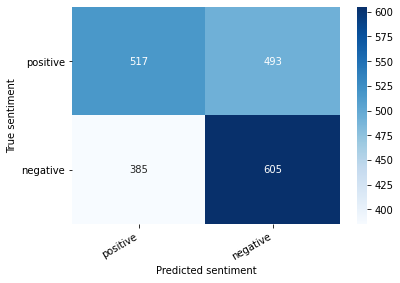

In [37]:
class_names = ["positive", "negative"]
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');
cm = confusion_matrix(trueSTR['LABEL_COLUMN'], predictedSTR)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [38]:
print(classification_report(trueSTR['LABEL_COLUMN'], predictedSTR, target_names = class_names))

              precision    recall  f1-score   support

    positive       0.57      0.51      0.54      1010
    negative       0.55      0.61      0.58       990

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000



In [39]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________
